## Lung Cancer Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df=pd.read_csv("lung_cancer_examples.csv")

In [4]:
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [5]:
df.tail()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
54,Ernest,Borgnine,26,13,6,1,0
55,Alec,Guinness,77,20,5,4,1
56,Charlton,Heston,75,15,3,5,1
57,Gregory,Peck,43,30,3,8,1
58,Sidney,Poitier,51,25,9,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB


In [7]:
df.describe()

,Age,Smokes,AreaQ,Alkhol,Result
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,42.627119,15.067797,5.203390,3.237288,0.474576
std,16.235230,7.984607,2.461984,2.380517,0.503640
min,18.000000,0.000000,1.000000,0.000000,0.000000
25%,29.000000,10.000000,3.000000,1.000000,0.000000
50%,39.000000,15.000000,5.000000,3.000000,0.000000
75%,55.000000,20.000000,7.500000,5.000000,1.000000
max,77.000000,34.000000,10.000000,8.000000,1.000000


In [8]:
df.corr()

,Age,Smokes,AreaQ,Alkhol,Result
Age,1.000000,0.053665,-0.268957,0.318621,0.637726
Smokes,0.053665,1.000000,-0.353295,0.469915,0.373444
AreaQ,-0.268957,-0.353295,1.000000,-0.714412,-0.746621
Alkhol,0.318621,0.469915,-0.714412,1.000000,0.810439
Result,0.637726,0.373444,-0.746621,0.810439,1.000000


<AxesSubplot:>

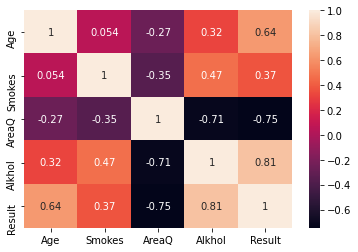

In [10]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

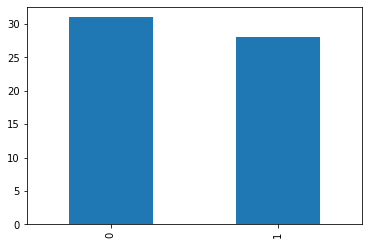

In [36]:
df.Result.value_counts().plot.bar()

In [11]:
df.isnull().sum()

Name       0
Surname    0
Age        0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64

In [12]:
def classification_funct(dataset,column_to_be_studied):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier #yüklemek için !pip install xgboost kullandım
    
    from sklearn.model_selection import train_test_split
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
       
    dataset=dataset[dataset[column_to_be_studied].notnull()]
    x,y=dataset.drop(column_to_be_studied,axis=1),dataset[[column_to_be_studied]]    
    x=pd.get_dummies(x,drop_first=True)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    
    algos=[g,b,KN,SVC,D,R,Log,XGB]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
   
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
        precision_scored.append(precision_score(y_test,item.predict(x_test)))
        recall_scored.append(recall_score(y_test,item.predict(x_test)))
        f1_scored.append(f1_score(y_test,item.predict(x_test)))
      
    result=pd.DataFrame(columns=['f1_score','recall_score','precision_score','accuracy_score'],index=algo_names)
    result['f1_score']=f1_scored
    result['recall_score']=recall_scored
    result['precision_score']=precision_scored
    result['accuracy_score']=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)

In [17]:
df_2=df.drop(["Name","Surname"],axis=1)
df_2.sample(5)

,Age,Smokes,AreaQ,Alkhol,Result
27,34,12,8,0,0
23,44,5,8,1,0
34,26,10,7,2,0
43,63,20,4,5,1
25,21,20,5,3,0


In [18]:
classification_funct(df_2,"Result")

[23:26:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,f1_score,recall_score,precision_score,accuracy_score
GaussianNB,0.857143,0.75,1.0,0.916667
DecisionTreeClassifier,0.857143,0.75,1.0,0.916667
RandomForestClassifier,0.857143,0.75,1.0,0.916667
LogisticRegression,0.857143,0.75,1.0,0.916667
XGBClassifier,0.857143,0.75,1.0,0.916667
KNeighborsClassifier,0.666667,0.50,1.0,0.833333
SVC,0.666667,0.50,1.0,0.833333
BernoulliNB,0.571429,1.00,0.4,0.500000


## Deep Learning Uygulanırsa?

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [27]:
model=Sequential()
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [28]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [29]:
x,y=df.drop("Result",axis=1),df[["Result"]]    
x=pd.get_dummies(x,drop_first=True)

In [30]:
model.fit(x,y,epochs=50,batch_size=5,verbose=1)

Epoch 1/50
12/12 [==============================] - 2s 70ms/step - loss: 1.2987 - accuracy: 0.4746
Epoch 2/50
12/12 [==============================] - 1s 68ms/step - loss: 0.7360 - accuracy: 0.5932
Epoch 3/50
12/12 [==============================] - 1s 83ms/step - loss: 0.4389 - accuracy: 0.7627
Epoch 4/50
12/12 [==============================] - 1s 70ms/step - loss: 0.0958 - accuracy: 1.0000
Epoch 5/50
12/12 [==============================] - 1s 61ms/step - loss: 0.3374 - accuracy: 0.8644
Epoch 6/50
12/12 [==============================] - 1s 70ms/step - loss: 0.0836 - accuracy: 0.9661
Epoch 7/50
12/12 [==============================] - 1s 75ms/step - loss: 0.0213 - accuracy: 1.0000
Epoch 8/50
12/12 [==============================] - 1s 73ms/step - loss: 0.0611 - accuracy: 0.9661
Epoch 9/50
12/12 [==============================] - 1s 65ms/step - loss: 0.0206 - accuracy: 1.0000
Epoch 10/50
12/12 [==============================] - 1s 70ms/step - loss: 0.0563 - accuracy: 0.9661
Epoch 11/

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               51712     
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 513       
Total params: 840,193
Trainable params: 840,193
Non-trainable params: 0
_________________________________________________________________


In [32]:
scores=model.evaluate(x,y)

2/2 [==============================] - 0s 48ms/step - loss: 1.6985e-06 - accuracy: 1.0000


In [33]:
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

accuracy: 100.00%
